In [1]:
import numpy as np
import matplotlib.pyplot as plt

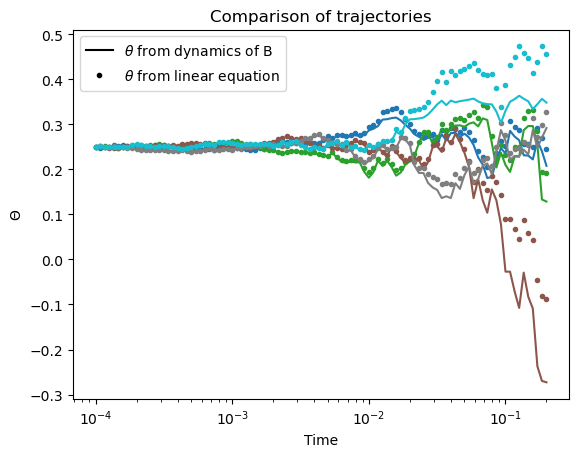

In [52]:
# Get next step of the white noise with amplitude 1
def get_step_white_noise():
    return np.random.normal(0, 1)

# Get trajector of the white noise with amplitude 1
def get_trajectory_white_noise(n):
    trajectory = np.zeros(n)
    for i in range(n):
        trajectory[i] = get_step_white_noise()
    return trajectory

# Define parameters
B0 = 20
J0 = 20
n = 100
sigma = 30
tc = 1
log_timesteps = np.logspace(-4,np.log10(0.2*tc),n)


# Get B trajectory as the Ornstein-Uhlenbeck process with correlation time tc, amplitude sigma and time-step dt 
# using the trajectory of the white noise
def get_trajectory_B(tc, sigma, n, trajectory_white_noise, log_timesteps):
    trajectory_B = np.zeros(n)
    for n,t in enumerate(log_timesteps):
        if n == 0:
            trajectory_B[n] = B0
        else:
            dt = t - log_timesteps[n-1]
            trajectory_B[n] = trajectory_B[n-1] - dt/float(tc)*(trajectory_B[n-1]) + sigma*np.sqrt(2*dt/float(tc))*trajectory_white_noise[n]
    return trajectory_B


# Get trajectory of theta using update equation th_n+1 = th_n + sigma*sqrt(2*dt/tc)/2/J0*trajectory_white_noise
def get_trajectory_linear_theta(sigma, J0, n, trajectory_white_noise,log_timesteps):
    trajectory_theta = np.zeros(n)
    for n,t in enumerate(log_timesteps):
        if n == 0:
            trajectory_theta[n] = np.arctan2(B0, J0)
        else:
            dt = t - log_timesteps[n-1]
            trajectory_theta[n] = trajectory_theta[n-1] + sigma*np.sqrt(dt/2/tc)/J0*trajectory_white_noise[n]
    return trajectory_theta 

# define trajectory of theta from trajectory of B using relation theta = np.arctan2(B,J0)
def get_trajectory_theta_from_B(trajectory_B):
    trajectory_theta = np.zeros(len(trajectory_B))
    for i in range(len(trajectory_B)):
        trajectory_theta[i] = np.arctan2(trajectory_B[i], J0)
    return trajectory_theta


#Compare few realisation of the trajectory of theta from B and from the white noise
trials = 5
trajectories = np.zeros((2,trials,n))
for k in range(trials): 
    white_noise = get_trajectory_white_noise(n)
    theta_from_B = get_trajectory_theta_from_B(get_trajectory_B(tc,sigma, n, white_noise,log_timesteps))
    theta = get_trajectory_linear_theta(sigma, J0, n, white_noise,log_timesteps)
    trajectories[0,k,:] = theta_from_B
    trajectories[1,k,:] = theta

# define n colors, where n =trials
colors = plt.cm.tab10(np.linspace(0,1,trials))

# Create a legend on the plot which says line i $\theta$ from B, points are $\theta$ from linear equation
plt.figure()
plt.title("Comparison of trajectories")
plt.xlabel("Time")
plt.ylabel("$\Theta$")
plt.plot([],[], color = "k", label = r"$\theta$ from dynamics of B")
plt.plot([],[], ".", color ="k", label = r"$\theta$ from linear equation")
plt.legend()

#Plot trajectories for a different trials, each trials should have its own color
for k in range(trials):
    plt.plot(log_timesteps,trajectories[0,k,:]/np.pi, color = colors[k])
    plt.plot(log_timesteps,trajectories[1,k,:]/np.pi, ".", color = colors[k])
plt.legend()

plt.xscale("log")
plt.show()




#


